In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dsets/data.csv")
print(df.shape)
df.head()

(30, 3)


,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


In [3]:
df_dropday = df.drop(columns=["Day "],axis=1)
df_dropday

,Conversion_A,Conversion_B
0,0.15,0.19
1,0.12,0.20
2,0.18,0.18
3,0.19,0.22
4,0.17,0.19
5,0.13,0.17
6,0.14,0.18
7,0.23,0.20
8,0.11,0.17
9,0.15,0.22


In [4]:
df_dropday.describe()

,Conversion_A,Conversion_B
count,30.000000,30.000000
mean,0.162000,0.193333
std,0.036141,0.027334
min,0.100000,0.150000
25%,0.132500,0.180000
50%,0.165000,0.190000
75%,0.187500,0.200000
max,0.230000,0.270000


In [5]:
meanA = df.loc[:, 'Conversion_A'].mean()
meanB = df.loc[:, 'Conversion_B'].mean()

stdA = df.loc[:, 'Conversion_A'].std()
stdB = df.loc[:, 'Conversion_B'].std()
print(meanA)
print(meanB)
print(stdA)
print(stdB)


0.162
0.19333333333333336
0.03614148442651082
0.027333613679526702


(array([2., 5., 6., 7., 3., 3., 2., 0., 1., 1.]),
 array([0.15 , 0.162, 0.174, 0.186, 0.198, 0.21 , 0.222, 0.234, 0.246,
        0.258, 0.27 ]),
 <BarContainer object of 10 artists>)

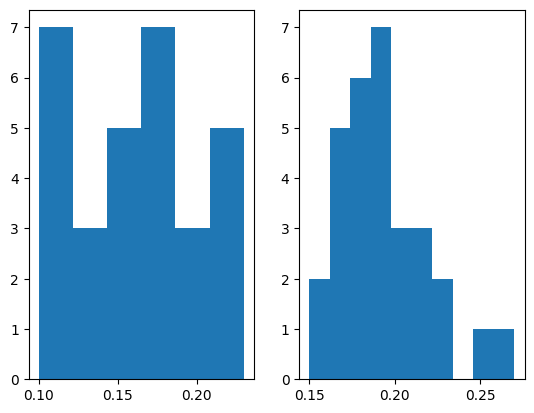

<Figure size 600x400 with 0 Axes>

In [15]:
from scipy.stats import norm
fig, axs = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize=(6,4))

axs[0].hist(df["Conversion_A"],bins=6)
axs[1].hist(df["Conversion_B"],bins=10)





<Axes: xlabel='Conversion_A', ylabel='Count'>

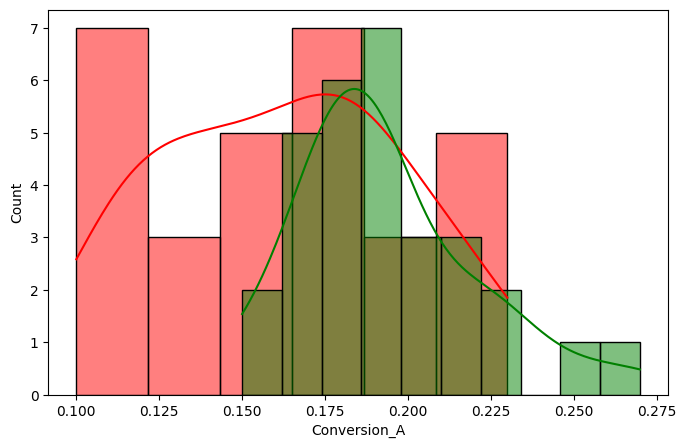

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df["Conversion_A"], label="A", color ="red", kde=True)
sns.histplot(df["Conversion_B"], label="B", color ="green", kde=True)

<ipython-input-48-c67f86a8f682>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Conversion_A, label="A", color ="yellow", hist=True)
<ipython-input-48-c67f86a8f682>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Conversion_B, label="B", color ="purple", hist=True)


Text(0, 0.5, 'Freq')

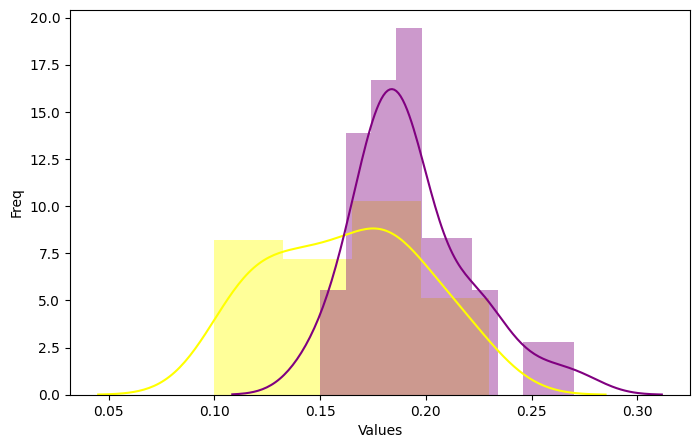

In [48]:
plt.figure(figsize=(8,5))
sns.distplot(df["Conversion_A"], label="A", color ="yellow", hist=True)
sns.distplot(df["Conversion_B"], label="B", color ="purple", hist=True)
plt.xlabel("Values")
plt.ylabel("Freq")

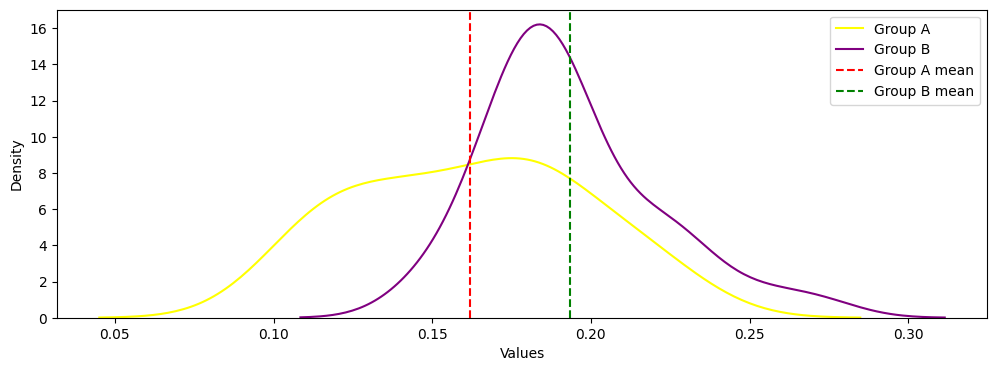

In [54]:
plt.figure(figsize=(12,4))
sns.kdeplot(df["Conversion_A"], label="Group A",color ="yellow")
sns.kdeplot(df["Conversion_B"], label="Group B",color ="purple")


plt.axvline(x=meanA,
            color="red",
            linestyle="dashed",
            label="Group A mean")
plt.axvline(x=meanB,
            color="green",
            linestyle="dashed",
            label="Group B mean")

plt.xlabel("Values")
plt.legend()

In [16]:
### Levene Test: Tests H0 all input samples from pop's w/ equal variances.

To test equal variances case

In [44]:
def check_pval(p_v, sig_level = 0.05):
  if p_v < sig_level:
    print(f"{p_v} is less than {sig_level} (significance level). Reject H0! ")
  else:
    print(f"{p_v} is not less than {sig_level} (significance level). Fail to reject H0! ")

In [18]:
from scipy.stats import levene
levene(df["Conversion_B"], df["Conversion_A"])

LeveneResult(statistic=5.392311404214254, pvalue=0.023757520229066957)

In [45]:
t_stat, p_v = stats.ttest_ind(df["Conversion_B"],
                           df["Conversion_A"],
                           equal_var=False)

print(t_stat, p_v)
check_pval(p_v)

3.78736793091929 0.00038453573945864804
0.00038453573945864804 is less than 0.05 (significance level). Reject H0! 
